# Электричество и магнетизм



In [55]:
#вычисление потенциала
def phi(q, xq, yq, X, Y):
    e0 = 8.85e-12
    Nq = len(q)
    Nx = len(X)
    Ny = len(Y)
    
    M = np.zeros((Nx, Ny))
    
    for i in range(Nx):
        for j in range(Ny):
            s = 0
            for k in range(Nq):
                s = s + q[k]/((X[i] - xq[k])**2+(Y[j] - yq[k])**2)**0.5
            
            M[i, j] = s/(4*e0*m.pi)
    return M

## Поле диполя


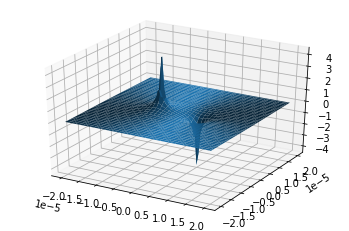

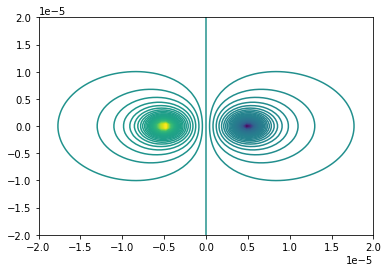

In [56]:
#Потенциал диполя
import matplotlib.pyplot as plt
import numpy as np
import math as m
from scipy import integrate

e = 1.6e-16
l = 1e-5
q = [e, -e]

xq = [-l/2, l/2]
yq = np.zeros(2)

N1 = 80
x_min = -2*l
y_min = -2*l

x_max = 2*l
y_max = 2*l

x = np.linspace(x_min, x_max, N1)
y = np.linspace(y_min, y_max, N1)
 
M = phi(q, xq, yq, x, y)
x1, y1 = np.meshgrid(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(y1, x1, M, linewidth=0)

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
cont = ax2.contour(y1, x1, M, 200)

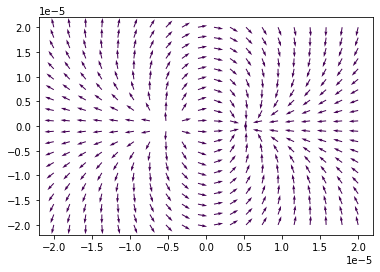

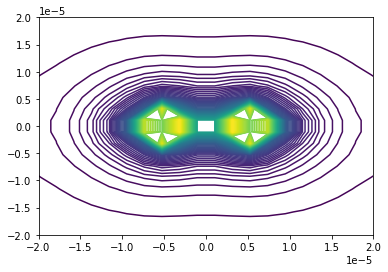

In [57]:
#Напряженность диполя
e = 1.6e-16
l = 1e-5
q = [e, -e]

xq = [-l/2, l/2]
yq = np.zeros(2)

N1 = 20
x_min = -2*l
y_min = -2*l

x_max = 2*l
y_max = 2*l

x = np.linspace(x_min, x_max, N1)
y = np.linspace(y_min, y_max, N1)
 
M = phi(q, xq, yq, x, y)
x1, y1 = np.meshgrid(x, y)

px, py = np.gradient(-M, 0.1, 0.1)
px1 = px/((px**2 + py**2)**0.5)
py1 = py/((px**2 + py**2)**0.5)

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
quiv = ax1.quiver(y1, x1, px1, py1, 0.5)

mp = (px**2 + py**2)**0.5

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
cont = ax2.contour(y1, x1, mp, 100)

## Поле квадроуполя

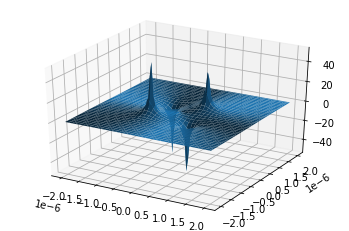

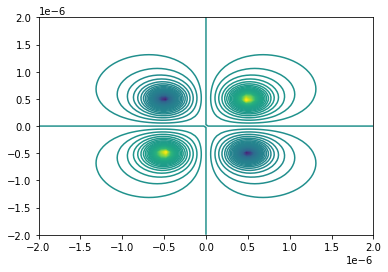

In [58]:
#Потенциал квадроуполя
e = 1.6e-16
l = 1e-6
q = [e, -e, e, -e]
xq = [l/2, l/2, -l/2, -l/2]
yq = [l/2, -l/2, -l/2, l/2]


N1 = 80
x_min = -2*l
y_min = -2*l

x_max = 2*l
y_max = 2*l

x = np.linspace(x_min, x_max, N1)
y = np.linspace(y_min, y_max, N1)
 
M = phi(q, xq, yq, x, y)
x1, y1 = np.meshgrid(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(y1, x1, M, linewidth=0)

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
cont = ax2.contour(y1, x1, M, 200)


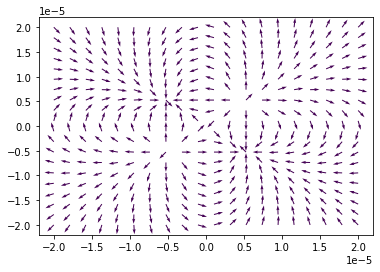

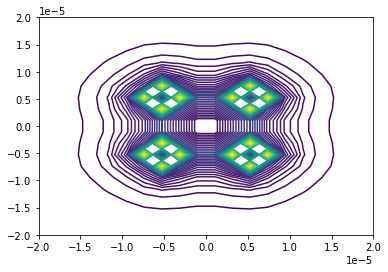

In [59]:
e = 1.6e-16
l = 1e-5


q = [e, -e, e, -e]
xq = [l/2, l/2, -l/2, -l/2]
yq = [l/2, -l/2, -l/2, l/2]

N1 = 20
x_min = -2*l
y_min = -2*l

x_max = 2*l
y_max = 2*l

x = np.linspace(x_min, x_max, N1)
y = np.linspace(y_min, y_max, N1)
 
M = phi(q, xq, yq, x, y)
x1, y1 = np.meshgrid(x, y)

px, py = np.gradient(-M, 0.1, 0.1)
px1 = px/((px**2 + py**2)**0.5)
py1 = py/((px**2 + py**2)**0.5)

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
quiv = ax1.quiver(y1, x1, px1, py1, 0.5)

mp = (px**2 + py**2)**0.5

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
cont = ax2.contour(y1, x1, mp, 100)

## Магнитный диполь

In [60]:
# Рассчет напряженности магнитного поля(пример)
def ringA(a, y, z):
    Nstep = 100
    x = 0
    Ny = len(y)
    Nz = len(z)
    
    delta_phi = 2*m.pi / Nstep
    
    phi = []
    for n in range(1, Nstep+2):
        phi.append(delta_phi * (n-1))
        
    ax = np.zeros((Ny, Nz), dtype=np.float64)
    ay = np.zeros((Ny, Nz), dtype=np.float64)
    az = np.zeros((Ny, Nz), dtype=np.float64) 
        
    for i in range(Ny):
        for j in range(Nz):
            s = np.array([0, 0, 0], dtype=np.float64)
            
            for n in range(Nstep+1):
                dL = np.array([-a*m.sin(phi[n]) * delta_phi, a*m.cos(phi[n])*delta_phi, 0])
                r = np.array([a*m.cos(phi[n]), a*m.sin(phi[n]), 0])
                R = np.array([x, y[i], z[j]])
                s = s + dL /(np.dot((R-r), (R-r)[None].T.conj()))**(1/2)
            
            ax[i][j] = s[0]
            ay[i][j] = s[1]
            az[i][j] = s[2]
    A = (ax**2 + ay**2 + az**2)**0.5
    return A

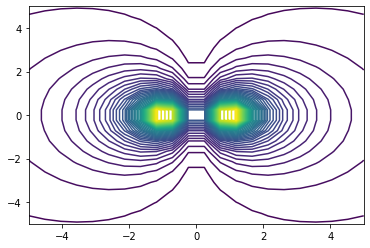

In [61]:
N1 = 21
y_min = -5
z_min = -5
y_max = 5
z_max = 5
y = []
z = []
for i in range(1, N1+2):
    y.append(y_min + (y_max - y_min)/N1 * (i-1))
    z.append(z_min + (z_max - z_min)/N1 * (i-1))
    
a = 1

mp = ringA(a, y, z)

y1, z1 = np.meshgrid(y, z)

fig = plt.figure()
ax = fig.add_subplot(111)

cont = ax.contour(z1, y1, mp, 55)

In [62]:

def ring(a, y, z):
    Nstep = 100
    x = 0
    Ny = len(y)
    Nz = len(z)
    M = [45 * 10 ** (-5)] * 3
    

    
        
    By = np.zeros((Ny, Nz), dtype=np.float64)
    Bz = np.zeros((Ny, Nz), dtype=np.float64)
        
        
    for i in range(Ny):
        for j in range(Nz):
            R = np.array([x, y[i], z[j]])
            s = np.array([0, 0, 0], dtype=np.float64)
            s = 3 * (M@R.T) / ((R[0] ** 2 + R[1] ** 2 + R[2] ** 2) ** (5 / 2)) * R - M / ((R[0] ** 2 + R[1] ** 2 + R[2] ** 2) ** (3 / 2))
            
            By[i][j] = s[1]
            Bz[i][j] = s[2]
            
    return (By, Bz)

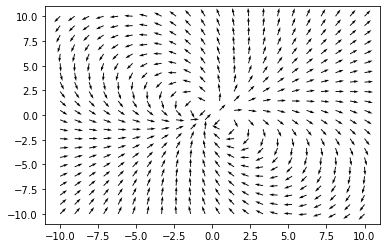

In [79]:
N1 = 21
y_min = -10
z_min = -10
y_max = 10
z_max = 10
y = []
z = []
for i in range(1, N1+2):
    y.append(y_min + (y_max - y_min)/N1 * (i-1))
    z.append(z_min + (z_max - z_min)/N1 * (i-1))
    
a = 1
By, Bz = ring(a, y, z)

mp = (By**2 + Bz**2)**0.5

by = By / mp
bz = Bz / mp

y1, z1 = np.meshgrid(y, z)

fig = plt.figure()
ax = fig.add_subplot(111)
quiv = ax.quiver(z1, y1, by, bz)

## Моделирование двиижения электрических зарядов в постоянном магнитном поле

In [90]:
H = [0, 0, 1]

def lorenz_force(t, z):
    f = np.zeros(6)
    f[0] = z[1]
    f[1] = 2*m.pi*(H[2]*z[3] - H[1]*z[5])
    f[2] = z[3]
    f[3] = -2*m.pi*(H[2]*z[1] - H[0]*z[5])
    f[4] = z[5]
    f[5] = 2*m.pi*(H[1]*z[1] - H[0]*z[3])
    
    return f


### Проекции на на плоскости

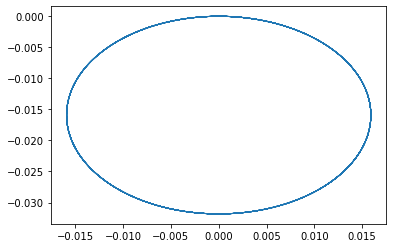

In [107]:
x0 = 0
y0 = 0
z0 = 0
vx0 = 0.1
vy0 = 0
vz0 = 0.01

t0, t1 = 0, 10                
t = np.linspace(t0, t1, 1000)  
R0 = [x0, vx0, y0, vy0, z0, vz0]                   

R = np.zeros((len(t), len(R0)), dtype=np.float64)   
R[0, :] = R0
r = integrate.ode(lorenz_force).set_integrator("dopri5")  
r.set_initial_value(R0, t0)  
for i in range(1, t.size):
    R[i, :] = r.integrate(t[i]) 
    if not r.successful():
        raise RuntimeError("Could not integrate")

fig = plt.figure()
ax = fig.add_subplot(111)

line = ax.plot(R[:,0], R[:,2], linewidth=1)


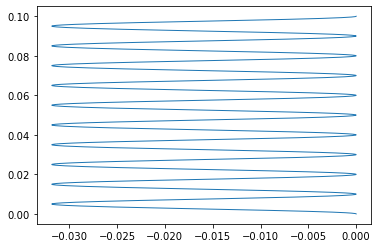

In [109]:
fig = plt.figure()
ax = fig.add_subplot(111)

line = ax.plot(R[:,2], R[:,4], linewidth=1)

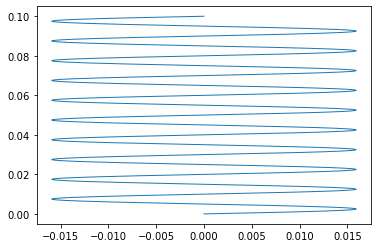

In [110]:
fig = plt.figure()
ax = fig.add_subplot(111)

line = ax.plot(R[:,0], R[:,4], linewidth=1)

### Период обращения.

In [115]:
radius = (max(R[:,0])  - min(R[:,0]))/2
V = (vx0**2 + vy0**2)**0.5
print(V)
period = 2*m.pi*radius/V


0.1


In [116]:
print(period)

0.9999987552936352


### Зависимость величины шага спирали от скорости движения заряда

In [121]:
x10 = 0
y10 = 0
z10 = 0
vx10 = 0.1
vy10 = 1
vz10 = 0.01

t01, t11 = 0, 10                
t = np.linspace(t10, t11, 1000)  
R0 = [x0, vx0, y0, vy0, z0, vz0]                   

R = np.zeros((len(t), len(R0)), dtype=np.float64)   
R1[0, :] = R0
r = integrate.ode(lorenz_force).set_integrator("dopri5")  
r.set_initial_value(R0, t0)  
for i in range(1, t.size):
    R[i, :] = r.integrate(t[i]) 
    if not r.successful():
        raise RuntimeError("Could not integrate")

fig = plt.figure()
ax = fig.add_subplot(111)
line = ax.plot(R[:,5], R[:, 5], linewidth=2)


NameError: name 't10' is not defined

# Зависимости скорости и ее проекций на соответствующие координатные плоскости.

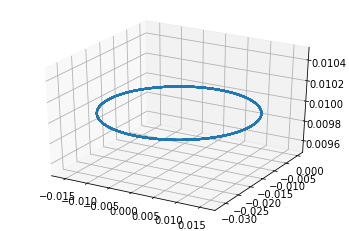

In [117]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")

surface = ax.plot(R[:,0], R[:,2], R[:, 5], linewidth=2)

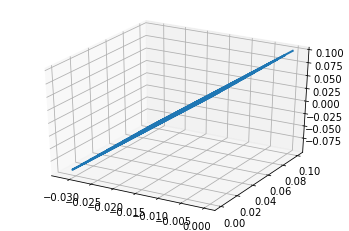

In [118]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")

surface = ax.plot(R[:,2], R[:,4], R[:, 1], linewidth=2)

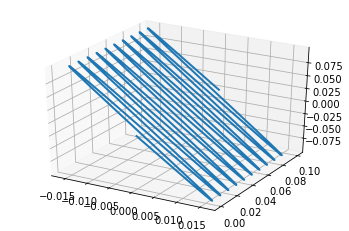

In [119]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")

surface = ax.plot(R[:,0], R[:,4], R[:, 3], linewidth=2)